<a href="https://colab.research.google.com/github/abdullahsaqib112/Deep_learning_Q2_Assignments/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
#Importing All Liabraries

import pandas as pd
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt



# Loading data using Pandas
data = pd.read_csv("CarPrice_Assignment.csv")


In [113]:
#Encoding All String data into numerical to pass into tensor

from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
data['CarName']= labelencoder.fit_transform(data['CarName'])
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['doornumber']=labelencoder.fit_transform(data['doornumber'])
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])
data['enginetype']=labelencoder.fit_transform(data['enginetype'])
data['cylindernumber']=labelencoder.fit_transform(data['cylindernumber'])
data['fuelsystem']=labelencoder.fit_transform(data['fuelsystem'])


In [114]:
#Splitting data And passing into Tensor


x = (data.loc[:, data.columns != 'price'])
y = (data.loc[:, data.columns == 'price'])

from sklearn.model_selection import train_test_split
train_data, test_data , train_targets , test_targets = train_test_split(x, y , test_size= 0.30, random_state=42)


#Subtracting mean And dividing with standard deviation to make data centered

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [115]:
#Building model

from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(26, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',
                loss = 'mse',
                metrics= ['mae'])
  return model



In [116]:
#Using K-fold Validation

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

all_mae_histories=[]

for i in range (k):
  print("processing Fold #", i)
  val_data= train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_target= train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                      train_data[(i + 1) * num_val_samples:]],
                                      axis = 0)
  
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],
                                        axis = 0)
  

  model = build_model()

  history = model.fit(partial_train_data,
                      partial_train_targets,
                      validation_data=(val_data, val_target),
                      epochs = num_epochs,
                      batch_size = 1 , verbose = 0)
  
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing Fold # 0
processing Fold # 1
processing Fold # 2
processing Fold # 3


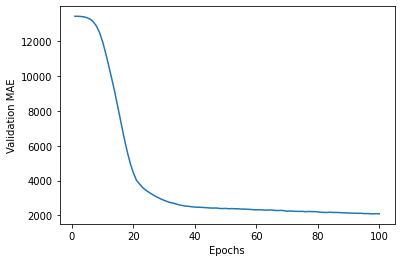

In [117]:

average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [118]:

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 7ms/step - loss: 8928687.0000 - mae: 1888.9240


In [119]:
test_mae_score

1888.9239501953125

In [129]:
#prediction

predictions = model.predict(test_data)
prediction = predictions.flatten()

In [130]:
output= pd.DataFrame({"Target Price" : test_targets.price, "Predicted Price" : prediction} )

In [127]:
output

,Target Price,Predicted Price
15,30760.000,30846.033203
9,17859.167,19063.271484
100,9549.000,8618.804688
132,11850.000,15412.849609
68,28248.000,22412.705078
...,...,...
56,11845.000,13451.864258
128,37028.000,34616.636719
76,5389.000,6373.745117
144,9233.000,8502.929688


In [135]:
output.to_csv('CarPriceProject,csv', index='false')
